<h2>Life Expectancy and GDP Correlation Analysis</h2>
<hr>
This project has a goal of analizing any possible correlations within the data. Steps such as <br>
data identification and preparation, followed by data analysis and visualization will be taken <br>
to discover connections within the data.

<b>Data Sources</b>
- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

Project is provided by Codecademy

<h2>Importing Libraries</h2>
<hr>
Here are the necessary libraries imported to analyze the data:
<ul>
<li>Pandas: Data Manipulation, used for data preparation and cleaning</li>
<li>Matplotlib: Data Visualization, used to analyze the data by visualizing it</li>
<li>Seaborn: Data Visualization, used to analyze the data by visualizing it</li>
</ul>

In [19]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

<h2>Loading the Data</h2>
<hr>
First, call <code>read_csv</code> to store in <code>data</code>. It will store the analyzed data.

In [20]:
#Saving csv in a variable
data = pd.read_csv('all_data.csv')
#Look at the top 10 data for example
data = pd.DataFrame(data)
data.head(10)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


Check if there's missing data

In [36]:
data.isnull().sum()

Country     0
Year        0
YLifeExp    0
GDP         0
dtype: int64

Next, call <code>data.info</code> to see the data's shape, column, and rows

In [21]:
#See data columns, index, length
data.info

<bound method DataFrame.info of      Country  Year  Life expectancy at birth (years)           GDP
0      Chile  2000                              77.3  7.786093e+10
1      Chile  2001                              77.3  7.097992e+10
2      Chile  2002                              77.8  6.973681e+10
3      Chile  2003                              77.9  7.564346e+10
4      Chile  2004                              78.0  9.921039e+10
..       ...   ...                               ...           ...
91  Zimbabwe  2011                              54.9  1.209845e+10
92  Zimbabwe  2012                              56.6  1.424249e+10
93  Zimbabwe  2013                              58.0  1.545177e+10
94  Zimbabwe  2014                              59.2  1.589105e+10
95  Zimbabwe  2015                              60.7  1.630467e+10

[96 rows x 4 columns]>

Then call <code>data.Country.unique()</code> to see the unique values in the Country column

In [22]:
#See unique entries in the Country column
data.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

Call <code>data.Year.unique()</code> to see the unique values in the Year Column

In [23]:
#See unique entries in the Year Column
data.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

The life expectancy column is deemed to long, so it's renamed to a more convenient one: YLifeExp

In [24]:
data = data.rename({'Life expectancy at birth (years)':'YLifeExp'}, axis='columns')
data.head(10)

,Country,Year,YLifeExp,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


Here is the average of each country's life expectancy and GDP, showing how different each country is.

In [25]:
#Processing the data average
data_mean = data.drop("Year", axis=1).groupby("Country").mean().reset_index()
data_mean

,Country,YLifeExp,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Using <code>data_mean.sort_values</code> can sort the data from the highest to lowest to help the visualization process

In [26]:
#Sorting the life expectancy and GDP from highest to lowest
YLifeExp_sorted = data_mean.sort_values(['YLifeExp'], ascending=False)
GDP_sorted = data_mean.sort_values(['GDP'], ascending=False)
YLifeExp_sorted

,Country,YLifeExp,GDP
2,Germany,79.65625,3.094776e+12
0,Chile,78.94375,1.697888e+11
4,United States of America,78.06250,1.407500e+13
3,Mexico,75.71875,9.766506e+11
1,China,74.26250,4.957714e+12
5,Zimbabwe,50.09375,9.062580e+09


In [27]:
GDP_sorted

,Country,YLifeExp,GDP
4,United States of America,78.06250,1.407500e+13
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
0,Chile,78.94375,1.697888e+11
5,Zimbabwe,50.09375,9.062580e+09


Next, let's analyze the correlation in the data.
By pivoting the data using <code>pd.pivot_table</code>, another view of the data could be seen.
For example, this data below shows that there's changes in each country's life expectancy over the years and how different one country is from another.

In [37]:
LifeExp_byYear = pd.pivot(data, index=['Country'], columns=['Year'], values=['YLifeExp'])
LifeExp_byYear

YLifeExp                                            \
Year                         2000  2001  2002  2003  2004  2005  2006  2007   
Country                                                                       
Chile                        77.3  77.3  77.8  77.9  78.0  78.4  78.9  78.9   
China                        71.7  72.2  72.7  73.1  73.5  73.9  74.2  74.4   
Germany                      78.0  78.3  78.4  78.5  79.1  79.2  79.6  79.8   
Mexico                       74.8  75.0  75.0  75.0  75.4  75.3  75.8  76.0   
United States of America     76.8  76.9  77.0  77.2  77.5  77.5  77.8  78.1   
Zimbabwe                     46.0  45.3  44.8  44.5  44.3  44.6  45.4  46.6   

                                                                          
Year                      2008  2009  2010  2011  2012  2013  2014  2015  
Country                                                                   
Chile                     79.6  79.3  79.1  79.8  79.9  80.1  80.3  80.5  
China                     74.5  74.9  75.0  75.2  75.4  75.6  75.8  76.1  
Germany                   79.9  80.0  80.1  80.5  80.6  80.6  80.9  81.0  
Mexico                    75.6  75.7  75.6  76.1  76.3  76.6  76.6  76.7  
United States of America  78.2  78.5  78.7  78.7  78.8  78.9  79.1  79.3  
Zimbabwe                  48.2  50.0  52.4  54.9  56.6  58.0  59.2  60.7

This data below shows there's changes in each country's GDP over the years and how different one country is
from another.

In [38]:
GDY_byYear = pd.pivot(data, index=['Country'], columns=['Year'], values=['GDP'])
GDY_byYear

GDP                              \
Year                              2000          2001          2002   
Country                                                              
Chile                     7.786093e+10  7.097992e+10  6.973681e+10   
China                     1.211350e+12  1.339400e+12  1.470550e+12   
Germany                   1.949950e+12  1.950650e+12  2.079140e+12   
Mexico                    6.836480e+11  7.247040e+11  7.415600e+11   
United States of America  1.030000e+13  1.060000e+13  1.100000e+13   
Zimbabwe                  6.689958e+09  6.777385e+09  6.342116e+09   

                                                                    \
Year                              2003          2004          2005   
Country                                                              
Chile                     7.564346e+10  9.921039e+10  1.229650e+11   
China                     1.660290e+12  1.955350e+12  2.285970e+12   
Germany                   2.505730e+12  2.819250e+12  2.861410e+12   
Mexico                    7.132840e+11  7.702680e+11  8.663460e+11   
United States of America  1.150000e+13  1.230000e+13  1.310000e+13   
Zimbabwe                  5.727592e+09  5.805598e+09  5.755215e+09   

                                                                    \
Year                              2006          2007          2008   
Country                                                              
Chile                     1.547880e+11  1.736060e+11  1.796380e+11   
China                     2.752130e+12  3.552180e+12  4.598210e+12   
Germany                   3.002450e+12  3.439950e+12  3.752370e+12   
Mexico                    9.652810e+11  1.043470e+12  1.101280e+12   
United States of America  1.390000e+13  1.450000e+13  1.470000e+13   
Zimbabwe                  5.443896e+09  5.291950e+09  4.415703e+09   

                                                                    \
Year                              2009          2010          2011   
Country                                                              
Chile                     1.723890e+11  2.185380e+11  2.522520e+11   
China                     5.109950e+12  6.100620e+12  7.572550e+12   
Germany                   3.418010e+12  3.417090e+12  3.757700e+12   
Mexico                    8.949490e+11  1.051130e+12  1.171190e+12   
United States of America  1.440000e+13  1.500000e+13  1.550000e+13   
Zimbabwe                  8.621574e+09  1.014186e+10  1.209845e+10   

                                                                    \
Year                              2012          2013          2014   
Country                                                              
Chile                     2.671220e+11  2.783840e+11  2.609900e+11   
China                     8.560550e+12  9.607220e+12  1.048240e+13   
Germany                   3.543980e+12  3.752510e+12  3.890610e+12   
Mexico                    1.186600e+12  1.261980e+12  1.298460e+12   
United States of America  1.620000e+13  1.670000e+13  1.740000e+13   
Zimbabwe                  1.424249e+10  1.545177e+10  1.589105e+10   

                                        
Year                              2015  
Country                                 
Chile                     2.425180e+11  
China                     1.106470e+13  
Germany                   3.375610e+12  
Mexico                    1.152260e+12  
United States of America  1.810000e+13  
Zimbabwe                  1.630467e+10

<h2>Exploring the Data using Visualization</h2>
<hr>
Exploring the data in table form is helpful, but using visualization is even better. <br>
Firstly, by using each country's life expectancy mean, we can see which country has the average highest and lowest life expectancy out of the others.

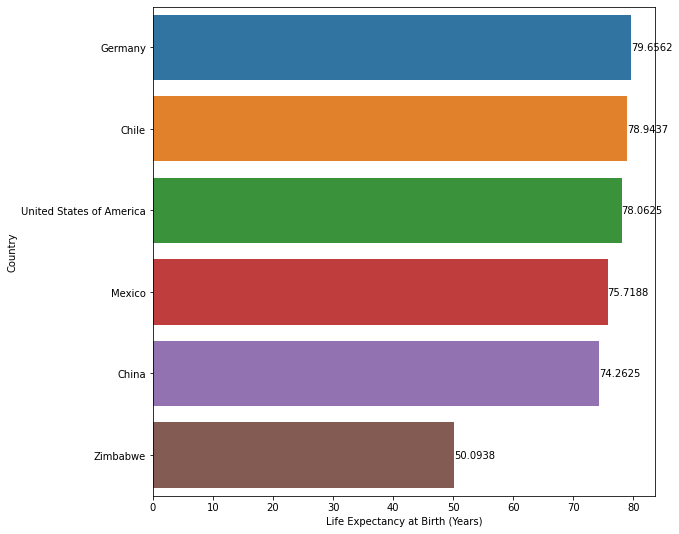

In [30]:
plt.figure(figsize=(9,9))
LifeExp = sns.barplot(y=YLifeExp_sorted['Country'], x=YLifeExp_sorted.YLifeExp, orient='h')
LifeExp.set_xlabel('Life Expectancy at Birth (Years)')
LifeExp.bar_label(LifeExp.containers[0])
plt.show()

According to the visuals above, the country with the highest life expectancy goes to Germany with the average life expectancy of 79.6 years old and the lowest goes to Zimbabwe with 50.09 years old. Excluding Zimbabwe, the other countries has the average life expectancy of 70 years old. Now let's look at the GDP depiction below.

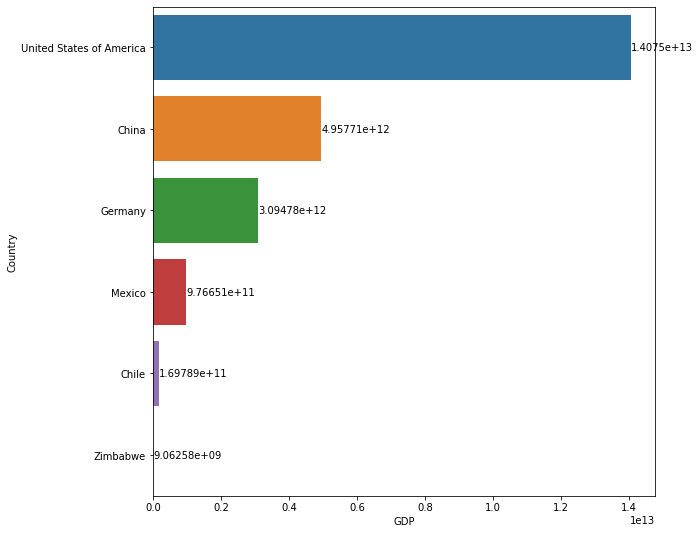

In [31]:
plt.figure(figsize=(9,9))
GDP = sns.barplot(y=GDP_sorted['Country'], x=GDP_sorted.GDP, orient='h')
GDP.bar_label(GDP.containers[0])
plt.show()

The highest average GDP goes to Unites States of America and the lowest goes to Zimbabwe. Next, let's explore whether both indicators experience growth over the years.

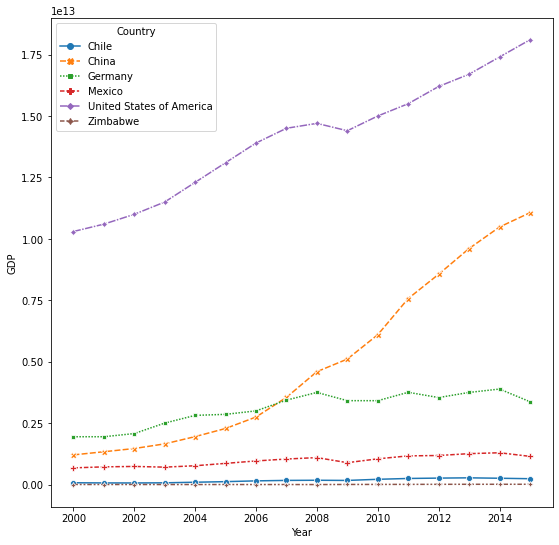

In [32]:
plt.figure(figsize=(9,9))
sns.lineplot(x=data.Year, y=data.GDP, hue=data.Country, style=data.Country, markers=True)
plt.show()

As seen above, both USA and China experience massive growth in their GDP, while Germany, Mexico, Chile and Zimbabwe either grow a little and shrink or stagnated.

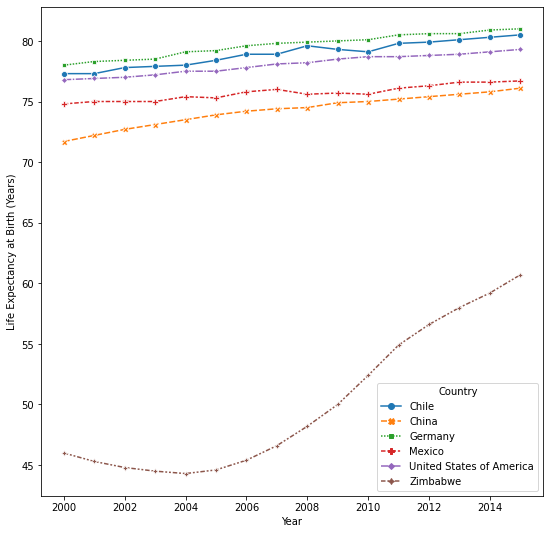

In [33]:
plt.figure(figsize=(9,9))
LifeExp = sns.lineplot(x=data.Year, y=data.YLifeExp, hue=data.Country, style=data.Country, markers=True)
LifeExp.set_ylabel("Life Expectancy at Birth (Years)")
plt.show()

As shown above, every country's life expectancy grows stably. Zimbabwe's life expectancy dropped until 2004, but has significantly grown overtime. After only checking both indicators, one must wonder if they have any correlation with each other. Now let's explore their correlation possibility.

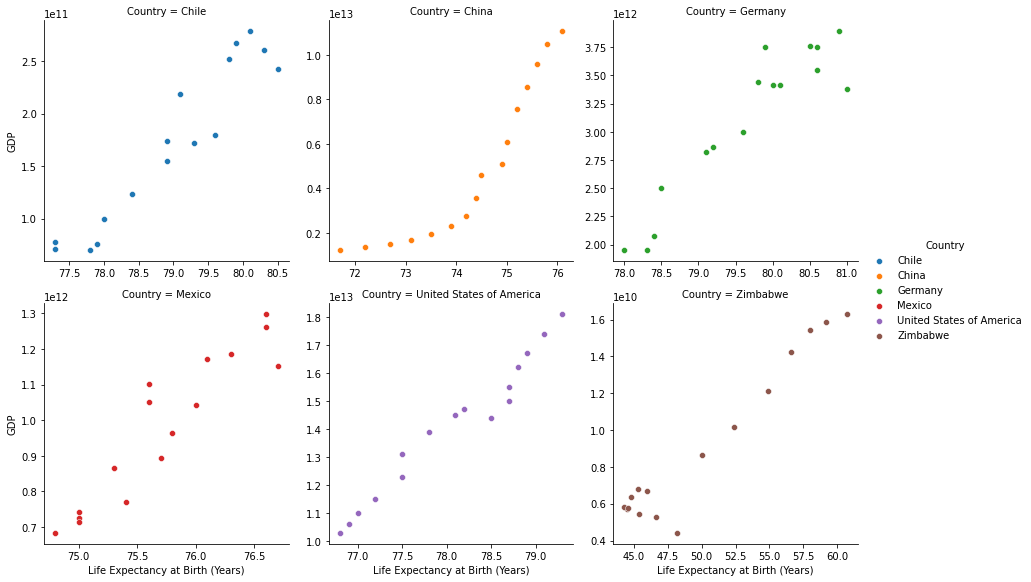

In [69]:
GDP_LifeExp = sns.FacetGrid(data, col="Country", hue="Country", height=4, col_wrap=3, sharey=False,
                           sharex=False)
GDP_LifeExp = (GDP_LifeExp.map_dataframe(sns.scatterplot, x="YLifeExp", y="GDP").add_legend()
               .set_axis_labels("Life Expectancy at Birth (Years)", 'GDP'))

As illustrated above, each country's GDP affects their life expectancy. Even with Zimbabwe whose GDP managed to shrink, when they grew again, it increased their life expectancy.

<h2>Conclusion</h2>
<hr>
After completing the steps above, here are some takeaways from the data analysis:
<ul>
    <li>United States of America has the highest average GDP.</li>
    <li>Germany has the highest life expectancy at birth.</li>
    <li>United States of America and China's GDP grows significantly, while the others either
        stagnated or just unstable.</li>
    <li>Excluding Zimbabwe, every other country's life expectancy steadily grows.</li>
    <li>Zimbabwe's life expectancy went down, but then significantly grows.</li>
    <li>GDP positively affects life expectancy.</li>
</ul>